# Regresión Lineal: Costo de un incidente de seguridad
En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada 
a un caso de usos sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio 
El ejercicio consiste en predecir el costo d eun incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de 
datos es generado de manera alenatoria

# 1.- Generación del DataSet

In [1]:
import numpy as np
X= 2 * np.random.rand(100, 1)
y= 4 + 3 * X + np.random.randn(100, 1)
print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

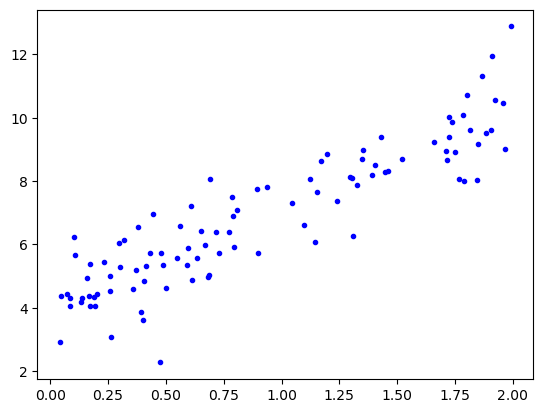

In [3]:
plt.plot (X, y, "b.")
plt.show()

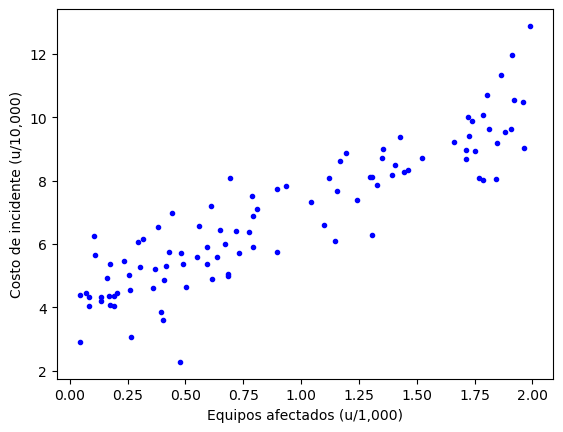

In [4]:
plt.plot(X, y, "b.")
plt. xlabel ("Equipos afectados (u/1,000)")
plt.ylabel("Costo de incidente (u/10,000)")
plt.show()

# 3.- Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_de_Equipos_afectados': X.flatten(), 'Costo': y.flatten()}
df= pd.DataFrame(data)
df.head(10)

,No_de_Equipos_afectados,Costo
0,0.487786,5.356767
1,0.548293,5.574029
2,0.044608,4.372058
3,0.135512,4.314201
4,1.145948,6.083604
5,1.170210,8.624243
6,0.406224,4.854860
7,0.634385,5.582894
8,0.442557,6.974333
9,1.738627,9.880339


In [7]:
# Escalado del número de equipos afectados
df['No_de_Equipos_afectados'] = df['No_de_Equipos_afectados'] * 1000
df['No_de_Equipos_afectados'] = df['No_de_Equipos_afectados'].astype('int')
#Escalado del costo
df['Costo'] = df['Costo']*10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_de_Equipos_afectados,Costo
0,487,53567
1,548,55740
2,44,43720
3,135,43142
4,1145,60836
5,1170,86242
6,406,48548
7,634,55828
8,442,69743
9,1738,98803


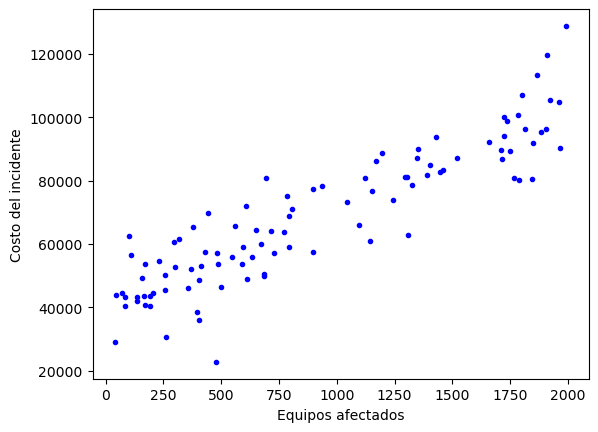

In [8]:
plt.plot(df['No_de_Equipos_afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel ("Costo del incidente")
plt.show()

# 4.- Construcción del modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [13]:
# Construcción del modelo y ajuste de la función de hipotesis
lin_reg= LinearRegression()
lin_reg.fit(df['No_de_Equipos_afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [14]:
# Parametro Tetha 0
lin_reg.intercept_

39790.78255768564

In [36]:
#Parametro Teta 1
lin_reg.coef_

array([31.59293865])

In [21]:
# Predicción del valor minimo y maximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_de_Equipos_afectados"].min()], [df["No_de_Equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

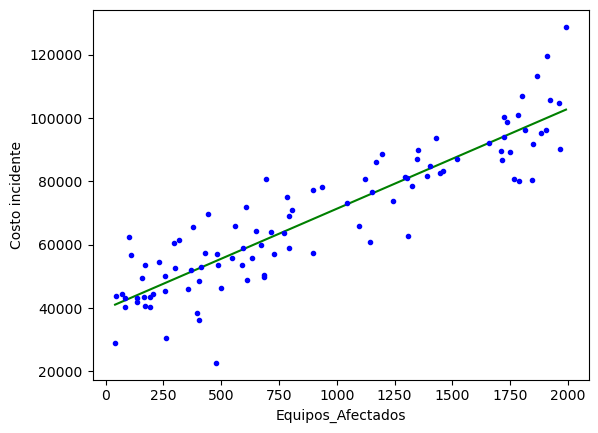

In [38]:
#Representación gráfica de la función de hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df["No_de_Equipos_afectados"], df['Costo'], "b.")
plt.xlabel("Equipos_Afectados")
plt.ylabel("Costo incidente")
plt.show()


# 5.- Predicción de nuevos ejemplos

In [47]:
x_new = np.array([[2100]]) # Número de equipos afectados.
# Predicción del costo que tendría el incidente
Costo = lin_reg.predict(x_new)
print("El costo del incidente sería: $", int(Costo[0]))

El costo del incidente sería: $ 106135


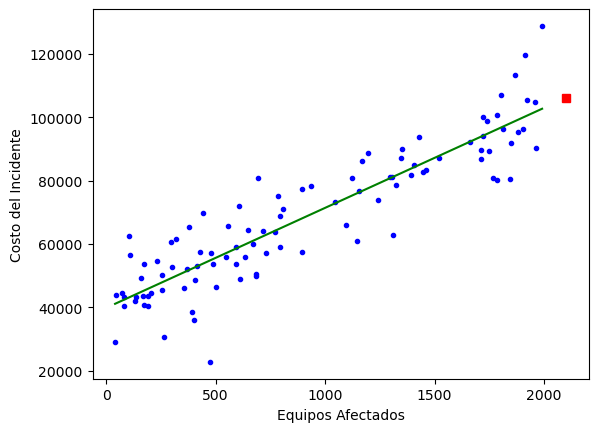

In [48]:
plt.plot(df["No_de_Equipos_afectados"], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()